## Bug - tSNE

In [28]:
%matplotlib inline
import pandas as pd
import numpy as np
from time import time
import matplotlib.pyplot as plt
import sklearn.preprocessing
import os,re

In [29]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/ping-dev04/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Build data

In [30]:
data = pd.read_csv('idata.csv')

In [31]:
data.head()

,Bug ID,Product,Component,Summary
0,1436291.0,Firefox for Android,Activity Stream,"Context menu animation broken when ""Delete fro..."
1,1436379.0,Firefox for Android,Activity Stream,Links do not work when Pocket stories are upda...
2,1254660.0,Firefox for Android,Activity Stream,Don't list both http and https versions of a U...
3,1273667.0,Firefox for Android,Activity Stream,Simplify long-press context menu for top sites...
4,1299685.0,Firefox for Android,Activity Stream,Consider replacing ActivityStream topsites' Vi...


In [32]:
train = pd.DataFrame()
train['bugID'] = data['Bug ID']
train['text'] = data['Summary']

In [33]:
train.head()

,bugID,text
0,1436291.0,"Context menu animation broken when ""Delete fro..."
1,1436379.0,Links do not work when Pocket stories are upda...
2,1254660.0,Don't list both http and https versions of a U...
3,1273667.0,Simplify long-press context menu for top sites...
4,1299685.0,Consider replacing ActivityStream topsites' Vi...


--------------

### TFIDF Vectorization

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
tfidf_vectorizer = TfidfVectorizer(analyzer="word",
                                   tokenizer=nltk.word_tokenize,
                                   preprocessor=None,
                                   stop_words='english',
                                   max_features=None)
sparce_tfidf = tfidf_vectorizer.fit_transform(train['text'])

In [36]:
from sklearn.decomposition import TruncatedSVD

In [37]:
svd = TruncatedSVD(n_components=100, n_iter=25, random_state=12)
t_tfidf = svd.fit_transform(sparce_tfidf)

-----------------

### Manifold Learning:  t-SNE

In [52]:
from sklearn.manifold import TSNE

In [53]:
X_embedded2d = TSNE(n_components=2).fit_transform(t_tfidf)
X_embedded2d.shape

(6154, 2)

In [54]:
X_embedded2d[0:5]

array([[-36.672646 ,   2.4022744],
       [ 23.778845 ,  29.041193 ],
       [-29.414394 ,  40.84823  ],
       [-37.84687  ,  42.109825 ],
       [-19.935913 , -40.744877 ]], dtype=float32)

In [55]:
X2d =[]
Y2d = []
for i in range(3175):
    X2d.append(X_embedded2d[i][0])
    Y2d.append(X_embedded2d[i][1])

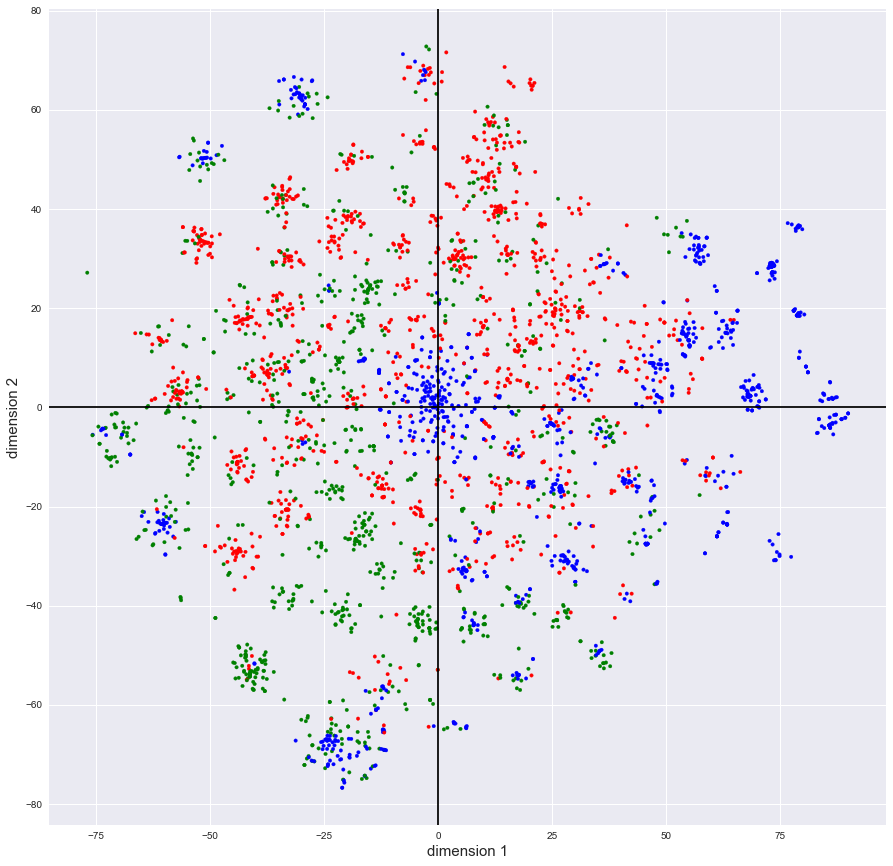

In [56]:
import seaborn as sns
sns.set()
plt.figure(figsize = [15,15])
plt.grid(True)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xlabel("dimension 1", fontsize=15)
plt.ylabel("dimension 2", fontsize=15)
plt.scatter(X2d,Y2d,color =clrs, marker ='.')
plt.savefig('tSNE2d.png')